<a href="https://colab.research.google.com/github/yeonji200522-oss/Hands-on-Machine-Learning/blob/main/%ED%95%B8%EC%A6%88%EC%98%A8%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**2장 머신러닝 프로젝트 처음부터 끝까지**
부동산 데이터 프로젝트를 가정.  
단계 설명  
1. 큰 그림 확인  
2. 데이터 수집  
3. 인사이트를 위해 탐색하고 시각화  
4. 머신러닝 알고리즘을 위해 데이터 준비  
5. 모델 선택, 훈련  
6. 파인 튜닝  
7. 솔루션 제시  
8. 시스템 론칭, 모니터링, 유지 보수

###**2.1 실제 데이터로 작업하기**
공개 데이터 저장소  
openML, kaggle, PapersWithCode,UC 어바인 머신러닝 저장소, 아마존 AWS 데이터셋, 텐서플롯 데이터셋  
메타 포털  
데이터 포털, 오픈 데이터 모니터  
기타  
위키백과 머신러닝 데이터셋 목록, Quora, 데이터셋 서브레딧  

###**2.2 큰그림보기**
####**2.2.1 문제 정의**
+ 파이프라인: 데이터 처리 component들이 연속되어 있는 것.  

비즈니스의 목적은 무엇인가? -> 현재 솔루션은 어떻게 구성되어 있는가?  
각 구역은 레이블된 훈련샘플을 가질 때 기대 출력값은 궁역의 중간 주택 가격을 설명. (지도 학습 문제)  
에측 대상이 연속적인 값일 때 회귀 문제.  
사용되는 특성이 여러 개 => 다변량 회귀  

####**2.2.2 성능 측정 지표 선택**
회귀 문제에서 모델의 예측값과 실제값 사이의 오차를 측정하는 지표인 RMSE를 대표적으로 사용  
**RMSE(평균제곱근오차)**  
- 회귀문제에서 가장 대표적으로 사용  
- 오차가 커질 수록 값이 더욱 증가  
- 이상치에 민감하다는 단점  
$$
\text{RMSE} = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(h(x^{(i)})-y^{(i})^2}
$$  

**MAE (평균 절대 편차)**
- 예측 오차의 절댓값 평균  
- RMSE보다 이상치에 덜 민감  
$$
\text{MAE} = \frac{1}{m} \sum_{i=1}^{m} |h(x^{(i)})-y^{(i)}|
$$

**노름(norm)**  
RMSE, MAE모두 예측값과 타깃값 사이의 거리를 재는 방법  
RMSE는 유클리드 노름, 절댓값의 합을 계산하는 것은 맨해튼 노름  
노름의 지수가 클수록 큰 값의 원소에 치우쳐져 작은 값은 무시.  

####**2.2.3 가정 검사**



###**2.3 데이터 가져오기**
####**2.3.5 데이터 다운로드**


In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():   #load_housing_data()함수를 통해 datasets/housing.tgz 파일 찾기
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():   #datasets/housing.tgz 파일을 찾지 못하면 dataset 디렉터리 생성
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz" #깃허브 저장소에서 housing.tgz 파일 다운로드
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv")) #이 파일 안의 데이터를 판다스 데이터프레임으로 로드해 객체 반환

housing = load_housing_data()

/tmp/ipython-input-147635879.py:13: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path="datasets")


####**2.3.6 데이터 구조 훑어보기**

아래 표를 참고  
+ 특성은 longitude, latitude, 등 10개  
+ .head()함수는 처음 다섯 행을 확인  
+ .info()함수는 데이터에 관한 간략한 설명  
전체 행 수, 각 특성의 타입과 널이 아닌 값의 개수를 확인

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


ocean_proximity는 csv파일에서 가져왔기에 텍스트 특성일것, 나머지는 숫자형.  
  
+ value_count(): 어떤 카테고리와 각 카테고리마다 얼마나 많은 구역이 있는지 확인  
+ describe(): 숫자형 특성의 요약 정보를 확인

In [5]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


숫자형 데이터의 형태를 빠르게 검토하기 위해서는 히스토그램으로 그려보는 것도 좋음.   
+ hist(): 히스토그램 그리기

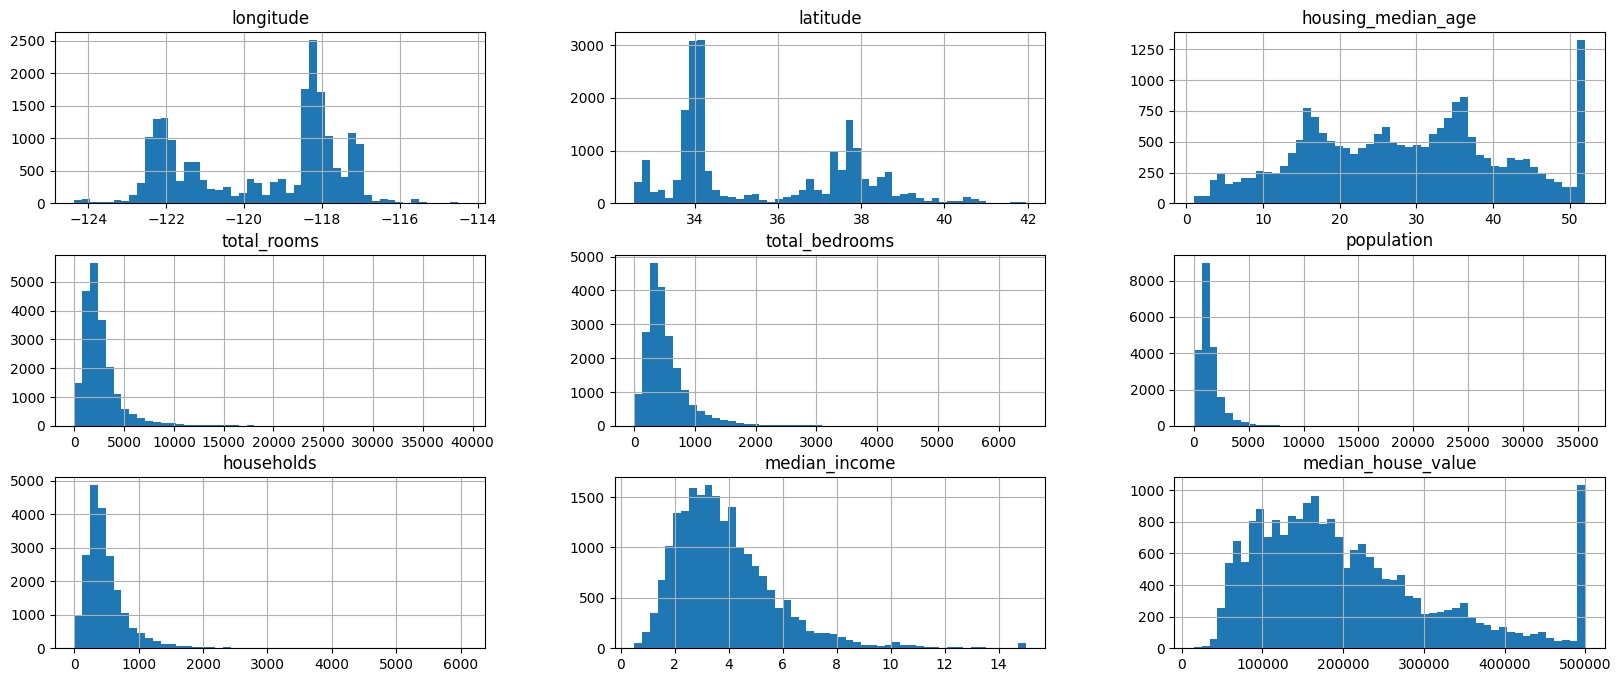

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,8))
plt.show()

<히스토그램 해석하기>  
1. 중간 주택 연도와 중간 주택 가격은 최댓값과 최솟값을 한정. 그러나 머신러닝이 한곗값을 넘어가지 않도록 학습하는 문제가 발생 할 가능성. 이 경우 아래 두 가지 경우를 고려  
- 한곗값 밖의 구역에 대한 정확한 레이블 구하기  
- 훈련 세트에서 이런 구역 제거  
2. 특성 스케일링 (나중에 공부하기)  
3. 대부분의 히스토그램에서 긴 오른쪽 꼬리 발견. 이 경우 머신러닝 알고리즘에서 패턴을 찾기 어려워 할 가능성 존재.

####**2.3.7 테스트 세트 만들기**  
+ 데이터 스누핑 편향: 데이터를 과도하게 탐색해 겉으로 보이는 실제로는 없는 패턴에 속아 잘못된 결론에 도달하게 되는 문제. 과적합의 원인이 되기도 함.   
  
<테스트 세트 만들기>  
샘플에서 랜덤으로 선택해 데이터셋의 20% 정도를 떼어놓기

In [9]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

In [11]:
len(test_set)

4128

하지만 위의 경우에는 다시 실행할 경우 다른 테스트 세트가 생성되기에 모든 데이터셋을 보는 셈. 이를 피하기 위해서는  
+ 처음 실행에서 테스트 세트를 저장 후 다음 실행에서 불러오기  
+ 항상 같은 난수 인덱스가 생성되도록 np.random.permutation() 호출 전 난수 발생기의 초깃값 지정 (예시, np.random.seed(42))  
  
다음번에 업데이트된 데이터셋을 사용할 때 문제 발생에서 안정적인 훈련/테스트 분할을 가능하게 하는 일반적인 해결책은 샘플의 식별자를 사용해 테스트 세트로 보낼지 말지 결정하는 것.

In [17]:
#반복 실행하며 데이터셋이 갱신되더라도 동일한 테스트 셋 유지하기
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
  return crc32(np.int64(identifier))<test_ratio*2*32

def split_data_with_id_hash(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set=ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

식별자 컬럼이 없는 경우 행의 인덱스를 ID로 사용

In [18]:
housing_with_id=housing.reset_index()

train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

행의 고유 식별자로 사용할 때 새 데이터는 데이터셋의 끝에 추가되며 삭제되지 않아야함.

In [21]:
# 아 왜

housing_with_id["id"]=housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set=split_data_with_id_hash(housing_with_id, 0.2, "id")

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).